### 步骤1 安装并引入必要的库

In [ ]:
!pip install numpy==1.16.0
!pip install pillow==6.2.1
!pip install matplotlib==3.1.0

In [1]:
!pip install tensorflow==2.0.0

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 102.7MB 83kB/s eta 0:00:011    |█████▋                          | 18.1MB 1.5MB/s eta 0:00:58     |████████████████▎               | 52.2MB 1.4MB/s eta 0:00:38     |████████████████████▍           | 65.6MB 927kB/s eta 0:00:41     |██████████████████████████████▎ | 97.3MB 326kB/s eta 0:00:17
     |████████████████████████████████| 450kB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 1.1MB/s eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=b593c64282102c2351da2a82a9afe0403d2a8d9a9782b7ff66ad0ac2795b8122
  Stored in directory: /Users/zeyuwang/Library/Caches/pip/wheels/1e/bb/b8/f56c307067a9e47f2e28dcdeaedbdd4675706187abfddbff3b
Successfully built gast
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing insta

In [2]:
import h5py
import numpy
import os
import zipfile
from IPython.display import Image
import tensorflow
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline

### 步骤2 载入图片数据

In [ ]:
#解压训练集数据
with zipfile.ZipFile('./train_data.zip') as z: 
    z.extractall()  

In [3]:
#遍历解压后的数据集，统计训练集和验证集里的数据量
files_train = 0
files_validation = 0

folder1 = 'train_data/train'
for sub_folder in os.listdir(folder1):
    if sub_folder != '.DS_Store':
        path, dirs, files = next(os.walk(os.path.join(folder1,sub_folder)))
        files_train += len(files)

folder2 = 'train_data/test'
for sub_folder in os.listdir(folder2):
    if sub_folder != '.DS_Store':
        path, dirs, files = next(os.walk(os.path.join(folder2,sub_folder)))
        files_validation += len(files)
#显示训练集的图片量和验证集的图片量
print(files_train,files_validation)

381 164


### 步骤3 设置主要参数

In [4]:
# 请在这里填写您的代码

#图片宽和高为48*48
img_width, img_height = 48, 48
#设置文件路径
train_data_dir = "train_data/train"
validation_data_dir = "train_data/test"
#批次大小
batch_size = 32
#周期数
epochs = 15
#种类数（空/非空车位）
num_classes = 2

### 步骤4 用预训练的VGG网络搭建CNN模型

In [5]:
#载入预训练好的VGG16神经网络，将图片数据输入网络
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
for layer in model.layers[:10]:
    layer.trainable = False

In [6]:
#将输出值展平
x = model.output
x = Flatten()(x)
#建立全连接层，并用softmax激活
predictions = Dense(num_classes, activation="softmax")(x)
#创建模型
model_final = Model(inputs = model.input, outputs = predictions)
#配置模型的训练方法
model_final.compile(loss = "categorical_crossentropy", 
                    optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), 
                    metrics=["accuracy"]) 

In [7]:
# 请在这里填写您的代码

#训练集数据
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range=0.1,
rotation_range=5)
#验证集数据
test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range=0.1,
rotation_range=5)

In [8]:
#用flow_from_directory从指定路径中生成数据集
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

Found 381 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [9]:
#将完整模型保存到model1.hdf5文件中
checkpoint = ModelCheckpoint("model1.hdf5", monitor='val_accuracy', 
                             verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto')

### 步骤5 训练模型

In [10]:
# 请在这里填写您的代码

history_object = model_final.fit_generator(
train_generator,
steps_per_epoch = 5,      
epochs = 15,
validation_data = validation_generator,
validation_steps = 5,  
callbacks = [checkpoint] )


Epoch 1/15
4/5 [=======================>......] - ETA: 2s - loss: 1.0690 - accuracy: 0.2578
Epoch 00001: val_accuracy improved from -inf to 0.54375, saving model to model_cnn.hdf5
5/5 [==============================] - 17s 3s/step - loss: 1.0392 - accuracy: 0.2875 - val_loss: 0.7038 - val_accuracy: 0.5437
Epoch 2/15
4/5 [=======================>......] - ETA: 2s - loss: 0.5985 - accuracy: 0.6800
Epoch 00002: val_accuracy improved from 0.54375 to 0.79375, saving model to model_cnn.hdf5
5/5 [==============================] - 17s 3s/step - loss: 0.5836 - accuracy: 0.6624 - val_loss: 0.4062 - val_accuracy: 0.7937
Epoch 3/15
4/5 [=======================>......] - ETA: 2s - loss: 0.3933 - accuracy: 0.7656
Epoch 00003: val_accuracy did not improve from 0.79375
5/5 [==============================] - 18s 4s/step - loss: 0.3683 - accuracy: 0.7834 - val_loss: 0.4011 - val_accuracy: 0.7812
Epoch 4/15
4/5 [=======================>......] - ETA: 2s - loss: 0.4414 - accuracy: 0.7188
Epoch 00004: val_

### 步骤6 绘制准确率曲线和损失曲线

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


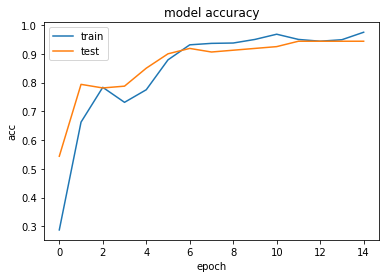

In [11]:
print(history_object.history.keys())
plt.plot(history_object.history['accuracy'])
plt.plot(history_object.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

从曲线图中我们可以看到，模型的准确率得到提高，说明模型在训练过程中得到进步。

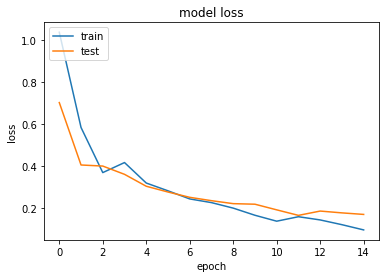

In [12]:
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

从曲线图中可以看到，随着训练次数提升，损失值逐步下降。我们的车位检测神经网络就训练完成了，在下一篇中我们将用训练好的神经网络去识别真实环境下的停车场车位变化。